<ipython-input-1-e6c8c729208d>:177: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 4)


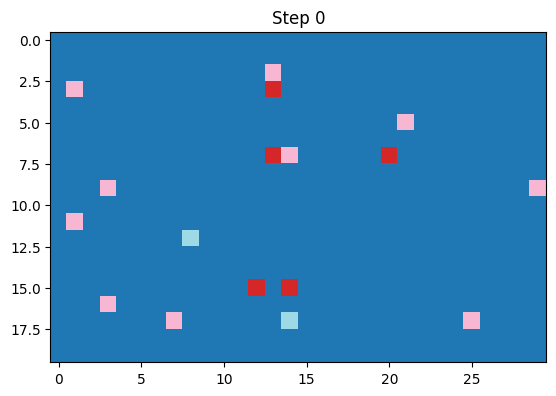

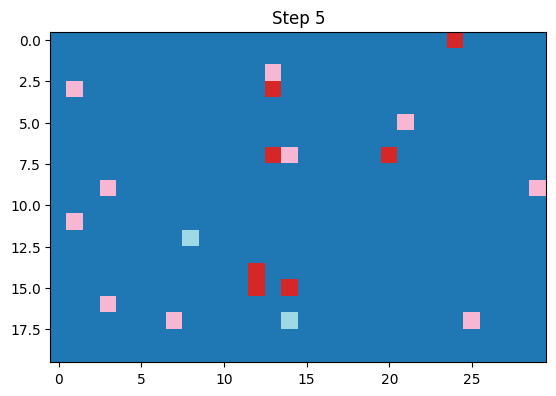

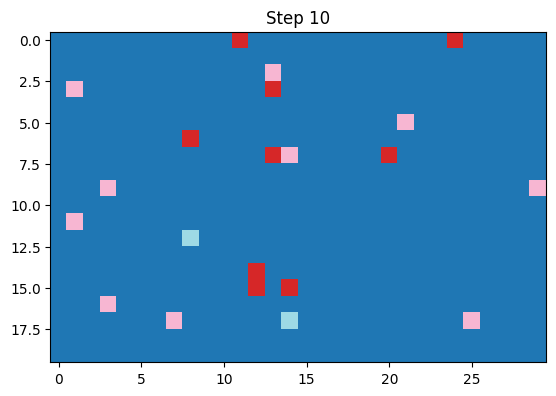

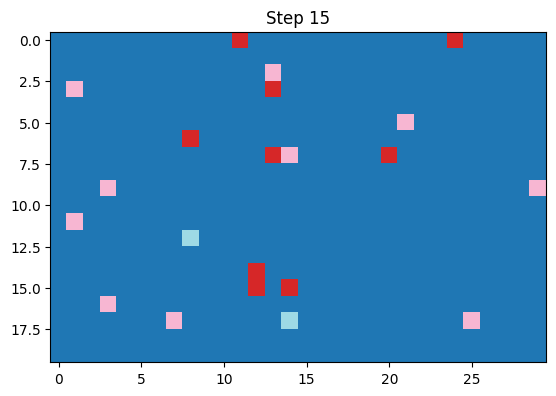

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Migliori parametri: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8809523809523809
Precision: 0.8214285714285714
Recall: 1.0
F1 Score: 0.9019607843137255
Confusion Matrix:
 [[14  5]
 [ 0 23]]


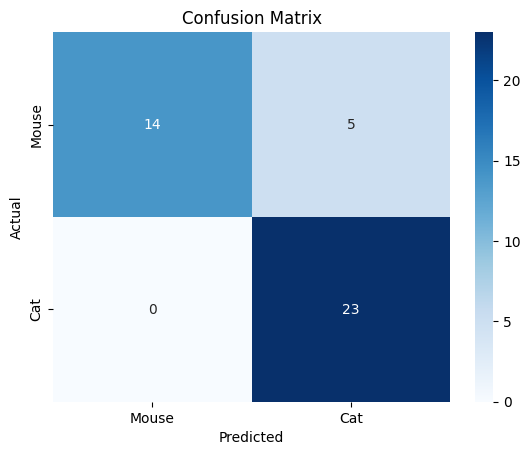

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# Funzione di Machine Learning ottimizzata
# ===============================
def apply_ml_with_optimized_model():
    # Carica i dati dal CSV
    data = []
    with open('simulation_data.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Salta l'intestazione
        for row in reader:
            data.append(row)
    data = np.array(data)

    # Estrazione delle caratteristiche comportamentali
    features = data[:, 4:6].astype(float)  # Esempio: velocità e direzione
    labels = np.array([1 if t == "cat" else 0 for t in data[:, 2]])  # Etichette: 1 = cat, 0 = mouse

    # SMOTE per bilanciare le classi
    smote = SMOTE(random_state=RANDOM_SEED)
    features_resampled, labels_resampled = smote.fit_resample(features, labels)

    # Standardizzazione delle caratteristiche
    scaler = StandardScaler()
    features_resampled = scaler.fit_transform(features_resampled)

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=RANDOM_SEED)

    # Ricerca dei migliori iperparametri con GridSearch
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', None]
    }

    # Creazione del modello Random Forest
    rf = RandomForestClassifier(random_state=RANDOM_SEED)

    # Ricerca dei migliori parametri
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Migliori parametri trovati
    print(f"Migliori parametri: {grid_search.best_params_}")

    # Predizioni con il miglior modello
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    # Calcolare le metriche
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Visualizzare la matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# ===============================
# Esegui la simulazione e il machine learning
# ===============================
with open('simulation_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Run', 'ID', 'Type', 'Step', 'X', 'Y', 'Velocity', 'Direction'])

grid, agents = initialize_environment()
agents = run_simulation(grid, agents)
save_data(agents, 'simulation_data.csv', 0)
apply_ml_with_optimized_model()
